In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data loading and assembly

In [4]:
spectra = pd.read_csv('../data/dataset.csv')
columns = ['target', 'sampleID']
columns.extend([str(x) for x in range(950, 1530+1,2)])
spectra = spectra[columns]
print(spectra.shape)
spectra.head()

(374, 293)


,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,94.333333,0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,94.333333,0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,94.333333,0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,94.333333,0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,76.333333,1,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


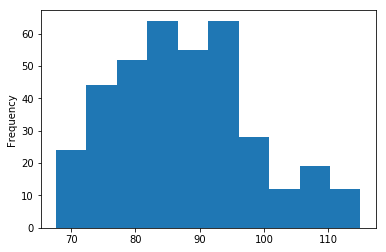

In [5]:
spectra['target'].plot.hist()

In [6]:
#spectra = spectra[spectra['target'] < 100]
spectra.shape

(374, 293)

# Dataset clean ?

In [7]:
spectra.describe()

,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,...,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,87.830660,47.449198,35.174972,34.169147,33.187555,32.305514,31.550925,30.972189,30.537403,30.191219,...,0.592180,0.657583,0.717708,0.763384,0.821528,0.881781,0.940160,1.000826,1.064528,1.128210
std,10.862842,27.340007,2.348484,2.384539,2.416738,2.441372,2.463001,2.482659,2.488624,2.492186,...,0.732162,0.740236,0.747614,0.754623,0.762236,0.770004,0.778396,0.787307,0.795612,0.804476
min,67.666667,0.000000,26.655676,25.505169,24.395685,23.420492,22.587944,21.945278,21.496870,21.147123,...,-1.764682,-1.726724,-1.690527,-1.660725,-1.626905,-1.592568,-1.559861,-1.527287,-1.488511,-1.451741
25%,79.666667,24.000000,33.992277,32.979221,32.002027,31.131445,30.383613,29.791392,29.379014,29.040488,...,0.157696,0.235855,0.301804,0.336286,0.388347,0.447060,0.510264,0.577586,0.633482,0.697918
50%,87.000000,47.500000,35.519716,34.525341,33.560844,32.674768,31.925820,31.391390,30.953384,30.609236,...,0.608148,0.669333,0.740480,0.782105,0.841150,0.898004,0.958507,1.024121,1.086988,1.143772
75%,94.666667,71.000000,36.750025,35.776736,34.838290,33.973112,33.227393,32.652846,32.225858,31.890627,...,1.032679,1.094054,1.155414,1.211737,1.289103,1.351089,1.420611,1.486343,1.554759,1.614336
max,115.000000,94.000000,42.143303,41.016056,39.927353,38.940678,38.071739,37.357346,36.864861,36.467106,...,2.929408,2.975907,3.031236,3.091215,3.146902,3.201092,3.255369,3.311751,3.375964,3.431573


In [8]:
spectra.isnull().sum().sum()

0

In [9]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Columns: 293 entries, target to 1530
dtypes: float64(292), int64(1)
memory usage: 856.2 KB


# Target description

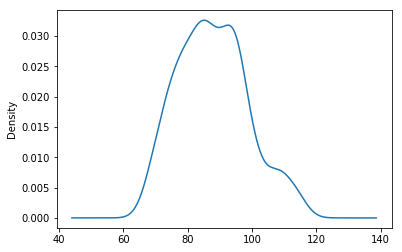

In [10]:
spectra['target'].plot.density()

In [11]:
# The closer to 0, the better
spectra['target'].skew()


0.3520918365929981

In [12]:
from scipy.special import inv_boxcox
from scipy import stats
spectra['targetBC'], lmbda = stats.boxcox(spectra['target'])

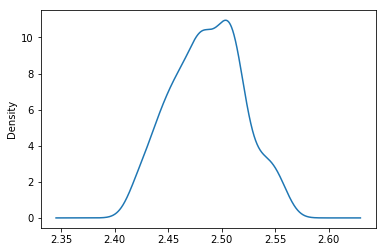

0.00712579420187513

In [13]:
spectra['targetBC'].plot.density()
plt.show()
spectra['targetBC'].skew()

# SampleID  aggregation

In [14]:
spectra[['target']].describe()

,target
count,374.000000
mean,87.830660
std,10.862842
min,67.666667
25%,79.666667
50%,87.000000
75%,94.666667
max,115.000000


OrderedDict([(0.0, 67.66666666666667), (0.25, 79.66666666666667), (0.5, 87.0), (0.75, 94.66666666666669), (1.0, 115.0)])


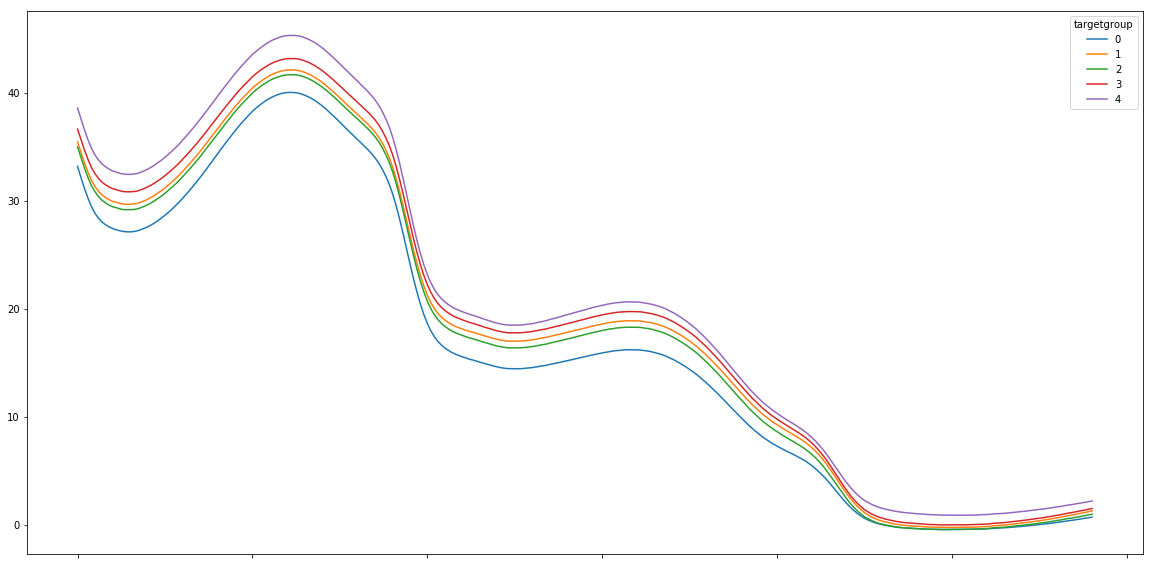

In [15]:
import collections
groupnumber = 5
# defines quant group
quants = spectra['target'].quantile(np.linspace(0, 1, groupnumber)).to_dict()
print(collections.OrderedDict(sorted(quants.items())))
def quantplacement(entry):
    index = -1
    for key,value in collections.OrderedDict(sorted(quants.items())).items():
        if entry < value:
            return index
        index += 1
    return index
        
spectra['targetgroup']=spectra['target'].apply(quantplacement)
spectra.drop(['target', 'targetBC', 'sampleID'], axis=1).groupby('targetgroup').mean().T.plot(figsize=(20,10))
plt.show()


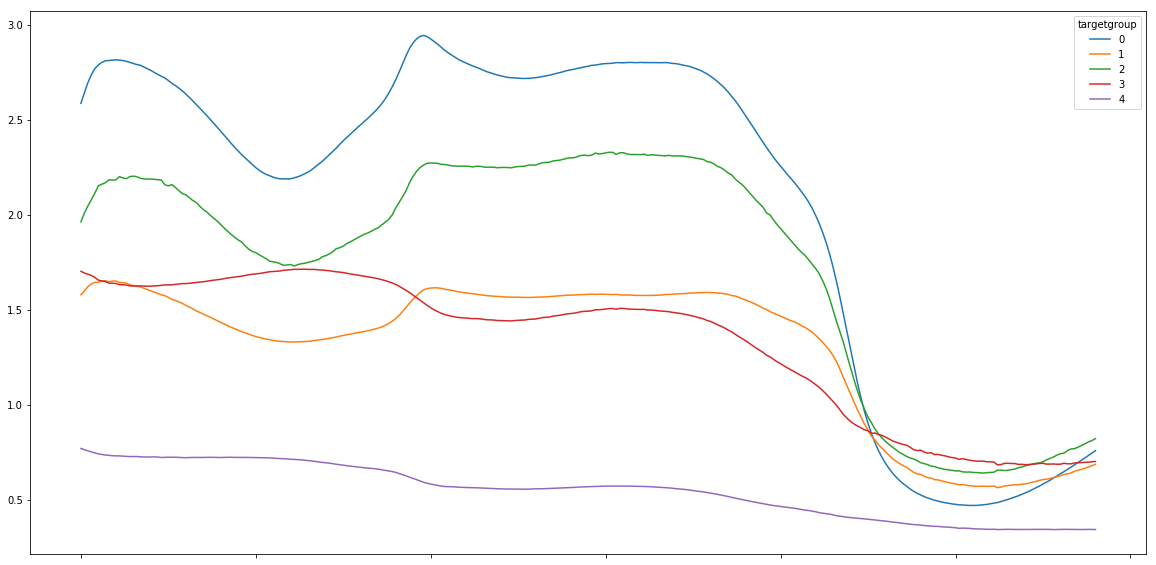

In [16]:
#Standard deviation
spectra.drop(['target', 'targetBC', 'sampleID'], axis=1).groupby('targetgroup').std().T.plot(figsize=(20,10))

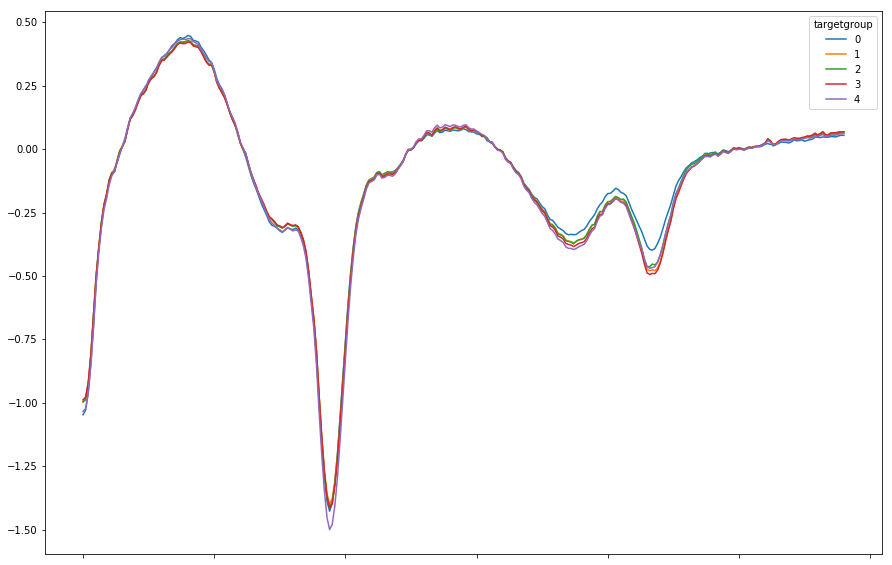

In [17]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()

def gradient(entry):
    #print(entry)
    return np.gradient(entry)

subset = spectra[[str(x) for x in range(950, 1530+1,2)]].apply(gradient, axis=1)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))

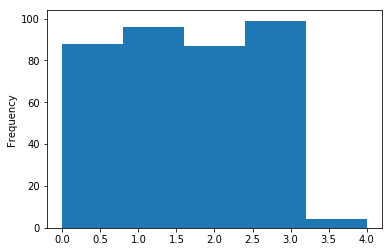

In [18]:
spectra['targetgroup'].plot.hist(bins = groupnumber)

In [19]:
spectra[spectra['targetgroup']==groupnumber-1]

,target,sampleID,950,952,954,956,958,960,962,964,...,1516,1518,1520,1522,1524,1526,1528,1530,targetBC,targetgroup
104,115.0,27,39.508755,38.466202,37.450317,36.528843,35.734688,35.116299,34.659451,34.295151,...,2.282603,2.324685,2.377963,2.431472,2.484010,2.539510,2.598077,2.659325,2.558584,4
105,115.0,27,38.475670,37.453480,36.452621,35.550095,34.772629,34.166264,33.716633,33.357536,...,1.818091,1.863091,1.920748,1.978510,2.034465,2.093160,2.155517,2.213567,2.558584,4
106,115.0,27,38.799370,37.755924,36.733612,35.807774,35.009800,34.387833,33.925297,33.552906,...,1.531907,1.568001,1.616462,1.666473,1.712421,1.762471,1.816300,1.874586,2.558584,4
107,115.0,27,37.646435,36.618404,35.612206,34.702469,33.919140,33.309620,32.859257,32.499924,...,1.565936,1.613511,1.673597,1.734282,1.793818,1.857408,1.923481,1.992472,2.558584,4


# Regression

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union

## Folds definition

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

## Savgol filter

https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

In [22]:
from scipy.signal import savgol_filter

class Savgol(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, params={}, columns=[str(x) for x in range(950, 1530+1,2)]):
        self.params = params
        self.columns = columns
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #[self.columns]
        return X.apply(lambda x:savgol_filter(x, **self.params), axis=1)
    
savgol = Savgol(params={'window_length':5, 'polyorder':2})
savgol.fit_transform(spectra).shape

(374, 295)

In [23]:
df = pd.DataFrame([[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9]])
savgol.fit_transform(df)

,0,1,2,3,4,5,6,7,8
0,1.657143,3.171429,3.542857,2.857143,0.657143,0.171429,1.0,4.0,9.0
1,1.657143,3.171429,3.542857,2.857143,0.657143,0.171429,1.0,4.0,9.0
2,1.657143,3.171429,3.542857,2.857143,0.657143,0.171429,1.0,4.0,9.0
3,1.657143,3.171429,3.542857,2.857143,0.657143,0.171429,1.0,4.0,9.0
4,1.657143,3.171429,3.542857,2.857143,0.657143,0.171429,1.0,4.0,9.0


## Column selection

In [24]:
class Colselect(BaseEstimator, TransformerMixin):
    def __init__(self, columns=[]):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.columns]

colselect = Colselect(['sampleID'])
colselect.fit_transform(spectra).shape

(374, 1)

## Blocs creation

In [25]:
savgol = Savgol({'window_length':5, 'polyorder':2})
savgol.fit_transform(spectra).shape

(374, 295)

In [26]:
colselect = Colselect(['sampleID'])
colselect.fit_transform(spectra).shape

(374, 1)

In [27]:
union = make_union(colselect, savgol)
union.fit_transform(spectra).shape

(374, 296)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
from sklearn.decomposition import PCA
pca = PCA()

In [30]:
from sklearn.kernel_ridge import KernelRidge
kridge = KernelRidge()

In [31]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(random_state=0, max_iter=10000)

## Pipe creation

In [32]:


#lrpipelist = [('scaler', scaler), ('pca', pca), ('elnet', elnet)]
lrpipelist = [('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
#lrpipelist = [('union', union), ('scaler', scaler), ('elnet', elnet)]
lrpipe = Pipeline(lrpipelist)

In [33]:
params={
        #'pca__n_components':[5, None],
        #'kridge__alpha':[0, 1e-1, 1e-3, 1e-4], #np.logspace(-10,-2,5),
        #'kridge__gamma':np.linspace(1e-5,1,5),
        #'kridge__kernel':['polynomial', 'linear', 'rbf'],
        'elnet__alpha':np.logspace(-6,-2,10),
        'elnet__l1_ratio':np.linspace(1e-5,1,10),
       }

In [34]:
lrgrid = GridSearchCV(lrpipe, params, cv=kf, scoring='neg_mean_squared_error', verbose=0, n_jobs=-2)
lrgrid.fit(spectra,spectra['targetBC'])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('colselect', Colselect(columns=['sampleID'])), ('savgol', Savgol(columns=['950', '952', '954', '956', '958', '960', '962', '964', '966', '968', '970', '972', '974', '976', '978', '980', '982', '984', '986', '988', '990', '992', '994',...e=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'elnet__alpha': array([1.00000e-06, 2.78256e-06, 7.74264e-06, 2.15443e-05, 5.99484e-05,
       1.66810e-04, 4.64159e-04, 1.29155e-03, 3.59381e-03, 1.00000e-02]), 'elnet__l1_ratio': array([1.0000e-05, 1.1112e-01, 2.2223e-01, 3.3334e-01, 4.4445e-01,
       5.5556e-01, 6.6667e-01, 7.7778e-01, 8.8889e-01, 1.0000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
 

In [35]:
lrgrid.best_score_

-1.8745868908870242e-06

In [36]:
lrgrid.best_params_

{'elnet__alpha': 1e-06, 'elnet__l1_ratio': 1e-05}

In [37]:
#bestparams = {k[8:]:v  for k,v in lrgrid.best_params_.items() if k.startswith('kridge__')}
#kridge = KernelRidge(**bestparams)

bestparams = {k[7:]:v  for k,v in lrgrid.best_params_.items() if k.startswith('elnet__')}
elnet = ElasticNet(random_state=0, max_iter=10000, **bestparams)

lrpipelist = [('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
#lrpipelist = [('union', union), ('scaler', scaler),  ('kridge', kridge)]
lrpipe = Pipeline(lrpipelist)
cross_val_score(lrpipe, spectra,spectra['targetBC'], cv=kf, scoring='neg_mean_squared_error').mean()

-1.8580400078223756e-06

In [38]:
preds = cross_val_predict(lrpipe, spectra,spectra['targetBC'], cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

0.21373381324235413

In [39]:
mean_squared_error(ypred, spectra['target'])**.5

0.4623135442990548

### HyperOpt

In [40]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [41]:
counter = 0
bestscore = 1e20

def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'alpha': params['alpha'],
        'l1_ratio': params['l1_ratio'],
        'random_state': 0,
        'max_iter':10000,
        }
    
    #print(hyperparams)
    
    elnet = ElasticNet(**hyperparams)

    pipe = [('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
    regpip = Pipeline(pipe)    
    
    preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , inv_boxcox(preds, lmbda))
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    if counter % 50 == 0:
        print("{} - MSE {}".format(counter, score))
    if score < bestscore:
        bestscore = score
        print("RMSECV {} - {}".format(score**.5, hyperparams))
    return score

space = {
    'alpha': hp.loguniform('alpha', -6, 2),
    'l1_ratio': hp.loguniform('l1_ratio',-6, 0),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=200)

RMSECV 2.2773964133395452 - {'alpha': 0.05497930908520002, 'l1_ratio': 0.009982565541988116, 'random_state': 0, 'max_iter': 10000}
RMSECV 1.3744387686956678 - {'alpha': 0.005178469873644883, 'l1_ratio': 0.07145694665343189, 'random_state': 0, 'max_iter': 10000}
RMSECV 1.0057007644313993 - {'alpha': 0.013311401626985507, 'l1_ratio': 0.0030658536772999786, 'random_state': 0, 'max_iter': 10000}
RMSECV 0.8818816582422271 - {'alpha': 0.0035091529008145893, 'l1_ratio': 0.006115842870070765, 'random_state': 0, 'max_iter': 10000}
RMSECV 0.8804467340663426 - {'alpha': 0.0025472262954198007, 'l1_ratio': 0.0185386257921198, 'random_state': 0, 'max_iter': 10000}
RMSECV 0.8724681303779681 - {'alpha': 0.003197948750670489, 'l1_ratio': 0.008265406900694097, 'random_state': 0, 'max_iter': 10000}
RMSECV 0.8608918799536888 - {'alpha': 0.0037978826135506333, 'l1_ratio': 0.004425031386174148, 'random_state': 0, 'max_iter': 10000}
RMSECV 0.8533563255307135 - {'alpha': 0.004183618330350537, 'l1_ratio': 0.00

In [42]:
params = {
        'alpha': best['alpha'],
        'l1_ratio': best['l1_ratio'],
        'random_state': 0,
        'max_iter':10000,
        }
params

{'alpha': 0.004183618330350537,
 'l1_ratio': 0.00249984994289881,
 'max_iter': 10000,
 'random_state': 0}

In [43]:
elnet = ElasticNet(**params)
pipe = [('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
regpip = Pipeline(pipe)

preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

0.7436356088663402

In [44]:
mean_squared_error(ypred, spectra['target'])**.5

0.8623430923167067

## Coeff verification

In [58]:
regpip.fit(spectra,spectra['targetBC'])
regpip.named_steps['elnet'].coef_[:20]

array([-0.00106336, -0.00127662,  0.00659998,  0.00401935,  0.01903105,
        0.00089363,  0.00446075, -0.00533621, -0.0243002 ,  0.01668132,
       -0.00160563, -0.        , -0.00207724, -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [59]:
regpip.named_steps['elnet'].coef_.max()

0.01903104708371587

## Score accuracy

In [46]:
df = pd.DataFrame({'target':spectra['target'], 'pred':ypred, 'sampeID':spectra['sampleID'], 'targetgroup':spectra['targetgroup']})
df.head()

,pred,sampeID,target,targetgroup
0,92.906341,0,94.333333,2
1,93.135197,0,94.333333,2
2,92.717314,0,94.333333,2
3,92.614846,0,94.333333,2
4,76.110316,1,76.333333,0


In [47]:
df['delta'] = df['target'] - df['pred']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,pred,sampeID,target,targetgroup,delta,deltaabs
0,92.906341,0,94.333333,2,1.426993,1.426993
1,93.135197,0,94.333333,2,1.198137,1.198137
2,92.717314,0,94.333333,2,1.616020,1.616020
3,92.614846,0,94.333333,2,1.718487,1.718487
4,76.110316,1,76.333333,0,0.223017,0.223017


In [48]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [.5,1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 374
prediction +/- 0.5 : percent 49.20 %
prediction +/- 1.0 : percent 83.42 %
prediction +/- 2.0 : percent 95.45 %
prediction +/- 3.0 : percent 99.73 %
prediction +/- 4.0 : percent 100.00 %
prediction +/- 6.0 : percent 100.00 %
prediction +/- 8.0 : percent 100.00 %
prediction +/- 10.0 : percent 100.00 %


In [49]:
df[['delta']].describe()

,delta
count,374.000000
mean,0.008287
std,0.863458
min,-3.095304
25%,-0.429574
50%,0.156732
75%,0.529916
max,2.639911


In [50]:
import seaborn as sns

/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


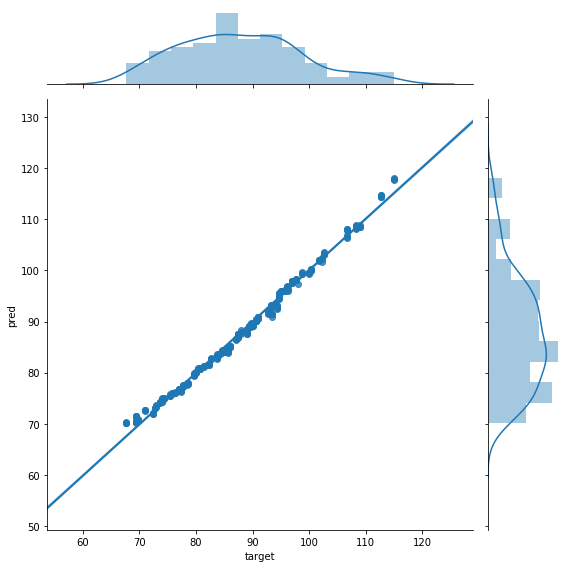

In [51]:
# No BOXCOX
sns.jointplot(x='target', y='pred', data=df, kind='reg', size=8, stat_func=None)
plt.show()

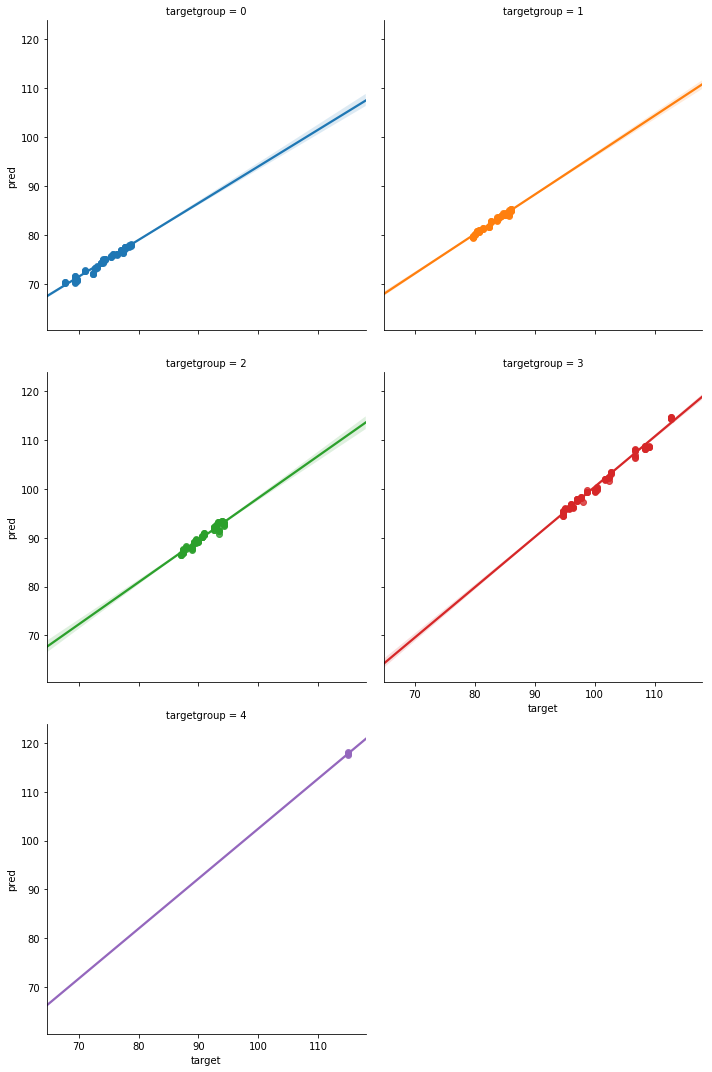

In [52]:
sns.lmplot(x='target',
           y='pred',
           col='targetgroup',
           hue='targetgroup',
           data=df,
           aspect=1,
           col_wrap=2,
           size=5,
           legend=True)
plt.show()

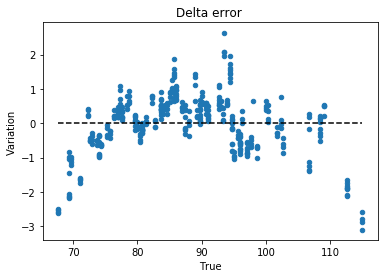

,delta
count,374.000000
mean,0.008287
std,0.863458
min,-3.095304
25%,-0.429574
50%,0.156732
75%,0.529916
max,2.639911


In [60]:

df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error ')
plt.xlabel('True')
plt.ylabel('Variation')
plt.show()
df[['delta']].describe()